# Visualization, EDA and Model Metrics Comparison for Car Insurance Cold Calls

****Let's Analyze the Data****

In [1]:
# Importing the required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from matplotlib import pyplot

from sklearn.feature_selection import SelectKBest,f_classif  # Feature Engineering
from sklearn.model_selection import train_test_split  # Splitting the dataset into training & testing

# Regression & Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


#Metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Loading the Dataset.

df_train=pd.read_csv('../input/carinsurance/carInsurance_train.csv')

In [3]:
df_train.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

# Handling the Missing Values

In [5]:
# There are missing values in the fields -> "Job", "Education", "Communication" & "Outcome".
# Let's check the percentage of missing values in them.

print("Missing values (Count):-")
print("\n")
print(df_train.isnull().sum())
print("\n")
print("Missing values (Percentage (%)):-")
print("\n")
print((df_train.isnull().sum()/len(df_train))*100)

Missing values (Count):-


Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64


Missing values (Percentage (%)):-


Id                   0.000
Age                  0.000
Job                  0.475
Marital              0.000
Education            4.225
Default              0.000
Balance              0.000
HHInsurance          0.000
CarLoan              0.000
Communication       22.550
LastContactDay       0.000
LastContactMonth     0.000
NoOfContacts         0.000
DaysPassed           0.000
PrevAttempts         0.000
Outcome             76.050
CallStart      

Highest percentage of missing data (76%) is in the "Outcome" field.
Let's handle the Missing values.

In [6]:
# Analyzing the Categorical values in the Missing value fields.

print("Job Field ->")
print(df_train.Job.value_counts())
print("\n")
print("Education Field ->")
print(df_train.Education.value_counts())
print("\n")
print("Communication Field ->")
print(df_train.Communication.value_counts())

Job Field ->
management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64


Education Field ->
secondary    1988
tertiary     1282
primary       561
Name: Education, dtype: int64


Communication Field ->
cellular     2831
telephone     267
Name: Communication, dtype: int64


In [7]:
# Let's determine the most commonly occuring values in the fields -> "Job", "Education" & "Communication".

print("Job Field")
print(df_train.Job.mode())
print("\n")
print("Education Field")
print(df_train.Education.mode())
print("\n")
print("Communication Field")
print(df_train.Communication.mode())

Job Field
0    management
dtype: object


Education Field
0    secondary
dtype: object


Communication Field
0    cellular
dtype: object


In [8]:
# Let's fill the missing values with their respective modes.

for i in ["Job","Education","Communication"]:
    df_train[i]=df_train[i].fillna(df_train[i].mode()[0])

In [9]:
# As 76% of the data is missing in "Outcome" field, it's better to drop the column.

df_train.drop('Outcome',axis=1,inplace=True)

In [10]:
# Converting the type of "CallStart" & "CallEnd" to Datetime.

df_train[['CallStart','CallEnd']]=df_train[['CallStart','CallEnd']].astype('datetime64[ns]')

In [11]:
# Calculating the total Call Duration

df_train['Call_Duration']=df_train['CallEnd']-df_train['CallStart']

# Extracting the time & converting it to seconds

df_train['Call_Duration']=df_train['Call_Duration'].dt.components['minutes']*60 + df_train['Call_Duration'].dt.components['seconds']
df_train['Call_Duration'].head()

0     70
1    185
2    340
3    819
4    192
Name: Call_Duration, dtype: int64

In [12]:
df_train.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance,Call_Duration
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,2021-02-02 13:45:20,2021-02-02 13:46:30,0,70
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,2021-02-02 14:49:03,2021-02-02 14:52:08,0,185
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,2021-02-02 16:30:24,2021-02-02 16:36:04,1,340
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,2021-02-02 12:06:43,2021-02-02 12:20:22,1,819
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,2021-02-02 14:35:44,2021-02-02 14:38:56,0,192


In [13]:
# Adding a column with Age Ranges.

def agerange(age):
    if age >= 18 and age <= 20:
        return "18-20"
    elif age >= 21 and age <= 30:
        return "21-30"
    elif age >= 31 and age <= 40:
        return "31-40"
    elif age >= 41 and age <= 50:
        return "41-50"
    elif age >= 51 and age <= 60:
        return "51-60"
    elif age >= 61 and age <= 70:
        return "61-70"
    elif age >= 71 and age <= 80:
        return "71-80"
    elif age >=81 and age <= 90:
        return "81-90"
    elif age > 90:
        return "Above 90"

In [14]:
df_train['Age Range']=df_train['Age'].apply(agerange)

# Data Visualization

In [15]:
# Let's analyze the Age of the Customers w.r.t Jobs

AgeRange_crosstab=pd.crosstab(index=df_train['Age Range'],columns=df_train['Job'])
AgeRange_crosstab

Job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
Age Range,,,,,,,,,,,
18-20,0,2,0,0,0,0,0,0,21,0,0
21-30,93,116,12,7,114,0,20,72,93,104,24
31-40,185,290,44,26,396,4,61,142,16,295,40
41-50,113,226,34,36,232,9,25,79,1,164,30
51-60,65,120,28,32,152,98,26,37,0,92,34
61-70,3,4,3,6,16,72,5,0,0,5,2
71-80,0,1,0,2,2,53,3,0,0,0,0
81-90,0,0,0,0,0,11,0,0,0,0,0
Above 90,0,0,0,0,0,2,0,0,0,0,0


* Almost all customers have been employed from the age of 21.
* The oldest customers are above 90 yrs & both of them are retired.
* Most of the Customers are in blue-collar or management Jobs & some are in technician & admin Jobs.

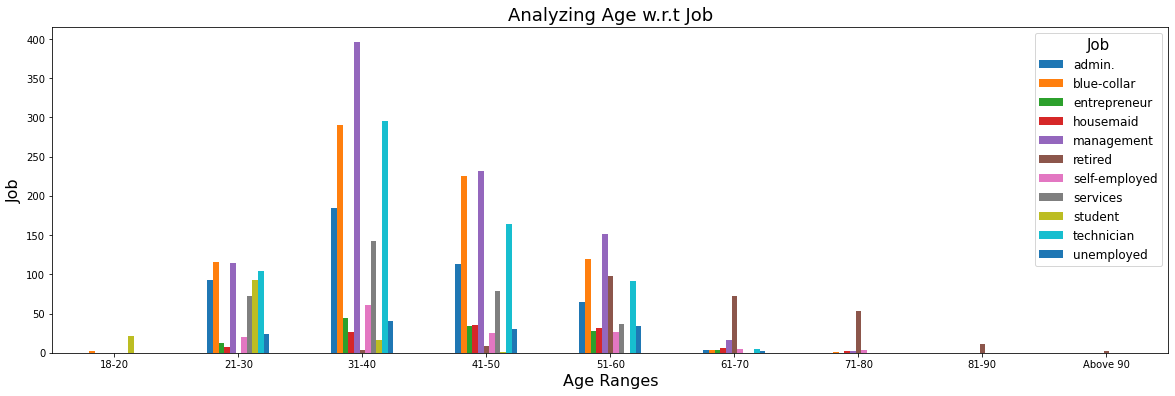

In [16]:
# Plotting the above values.

AgeRange_crosstab.plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0)
plt.xlabel('Age Ranges',fontsize=16)
plt.ylabel('Job',fontsize=16)
plt.title('Analyzing Age w.r.t Job',fontsize=18)
plt.legend(title='Job',title_fontsize=15,prop={"size":12})

In [17]:
# Let's check the age dependancy w.r.t Car Insurance Opting Decisions

Age_crosstab=pd.crosstab(index=df_train['Age Range'],columns=df_train['CarInsurance'])
Age_crosstab['Percentage Enrolled']=round(Age_crosstab[1]/(Age_crosstab[0]+Age_crosstab[1])*100,2)
Age_crosstab

CarInsurance,0,1,Percentage Enrolled
Age Range,,,
18-20,7,16,69.57
21-30,342,313,47.79
31-40,955,544,36.29
41-50,618,331,34.88
51-60,434,250,36.55
61-70,21,95,81.90
71-80,16,45,73.77
81-90,3,8,72.73
Above 90,0,2,100.00


* Majority of the people who've Enrolled for the car insurance are in their 30s & also Majority of the rejectors are also in their 30s.
* But Most of the people who've Enrolled range from 21 to 60 yrs of age maybe due to job securities.

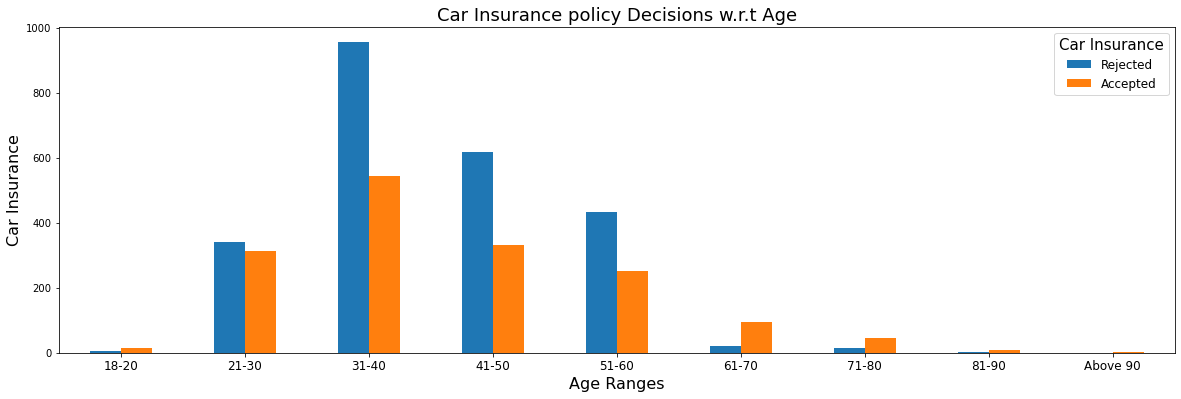

In [18]:
# Plotting the above values.

Age_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Age Ranges',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance policy Decisions w.r.t Age',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [19]:
# Let's check the Job dependancy w.r.t Car Insurance Opting Decisions

Job_crosstab=pd.crosstab(df_train['Job'],df_train['CarInsurance'],colnames=['Car Insurance'])
Job_crosstab['Percentage Enrolled']=round(Job_crosstab[1]/(Job_crosstab[0]+Job_crosstab[1])*100,2)
Job_crosstab

Car Insurance,0,1,Percentage Enrolled
Job,,,
admin.,274,185,40.31
blue-collar,540,219,28.85
entrepreneur,86,35,28.93
housemaid,72,37,33.94
management,511,401,43.97
retired,103,146,58.63
self-employed,86,54,38.57
services,218,112,33.94
student,44,87,66.41


* Most of the people who've enrolled for the insurance are working in management or Technician jobs.
* Surprisingly, unemployed members Enrolled for the insurance are more than the ones who have rejected it.

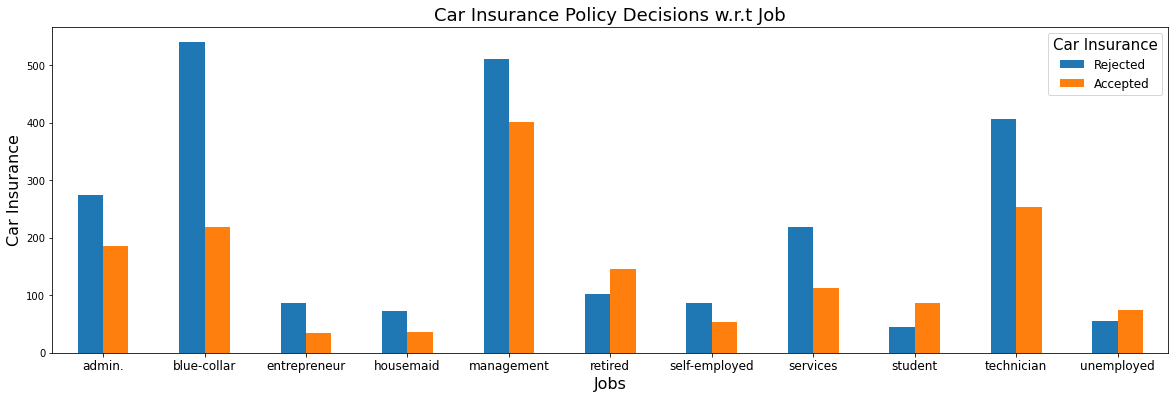

In [20]:
# Plotting the above values.

Job_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Jobs',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t Job',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [21]:
# Let's check the dependancy of marital status on Car Insurance Opting Decisions

Marital_crosstab=pd.crosstab(df_train['Marital'],df_train['CarInsurance'],colnames=['Car Insurance'])
Marital_crosstab['Percentage Enrolled']=round(Marital_crosstab[1]/(Marital_crosstab[0]+Marital_crosstab[1])*100,2)
Marital_crosstab

Car Insurance,0,1,Percentage Enrolled
Marital,,,
divorced,273,210,43.48
married,1471,833,36.15
single,652,561,46.25


* people who are single have enrolled for the insurance more than the divorced ones & married people are the highest group to have enrolled in it.

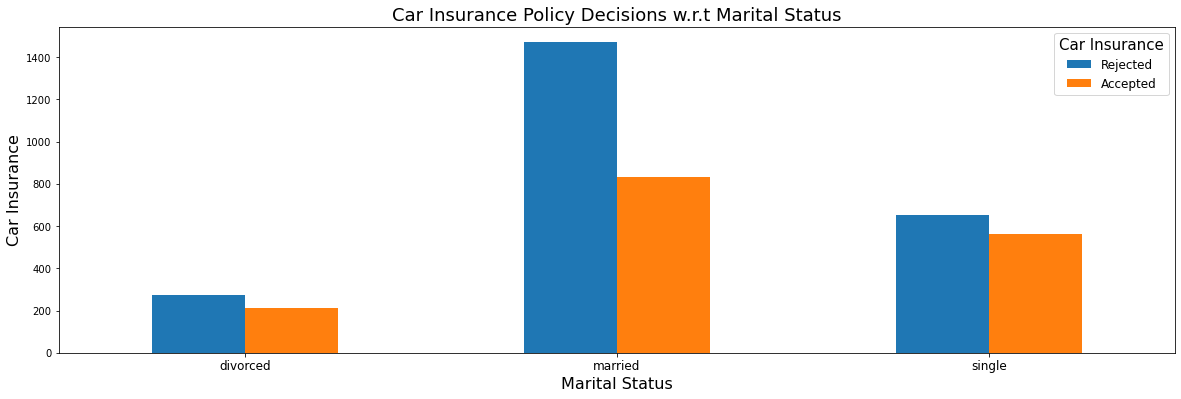

In [22]:
# Plotting the above values.

Marital_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Marital Status',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t Marital Status',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [23]:
# Let's check the dependancy of Education on Car Insurance Opting Decisions

Education_crosstab=pd.crosstab(df_train['Education'],df_train['CarInsurance'],colnames=['Car Insurance'])
Education_crosstab['Percentage Enrolled']=round(Education_crosstab[1]/(Education_crosstab[0]+Education_crosstab[1])*100,2)
Education_crosstab

Car Insurance,0,1,Percentage Enrolled
Education,,,
primary,366,195,34.76
secondary,1348,809,37.51
tertiary,682,600,46.80


* People having secondary level of education are the highest enrollers. But, there are more rejectors than enrollers.

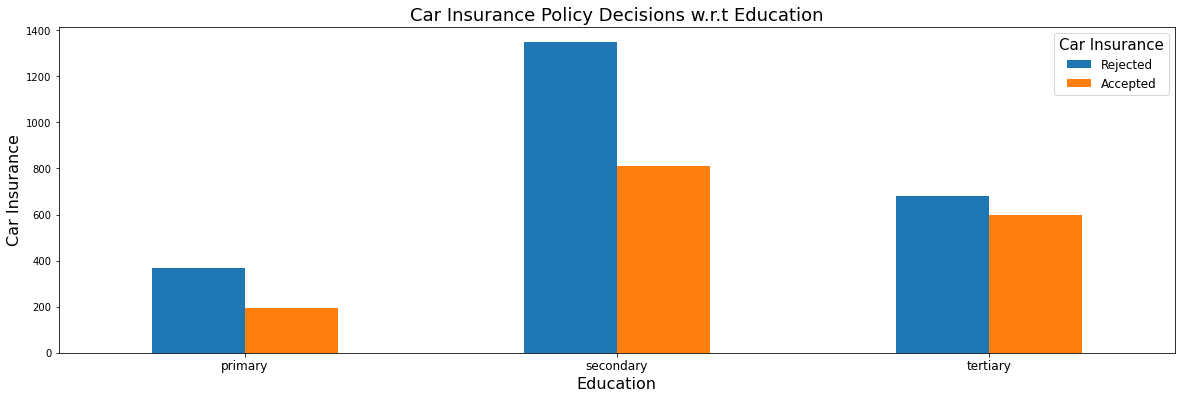

In [24]:
# Plotting the above values.

Education_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Education',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t Education',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [25]:
# Let's check the dependancy of House-Hold Insurance on Car Insurance Opting Decisions

HHInsurance_crosstab=pd.crosstab(df_train['HHInsurance'],df_train['CarInsurance'],colnames=['Car Insurance'])
HHInsurance_crosstab['Percentage Enrolled']=round(HHInsurance_crosstab[1]/(HHInsurance_crosstab[0]+HHInsurance_crosstab[1])*100,2)
HHInsurance_crosstab

Car Insurance,0,1,Percentage Enrolled
HHInsurance,,,
0,1016,1013,49.93
1,1380,591,29.98


* Most of them having a House-Hold Insurance (1380 Customers) have rejected the car Insurance.

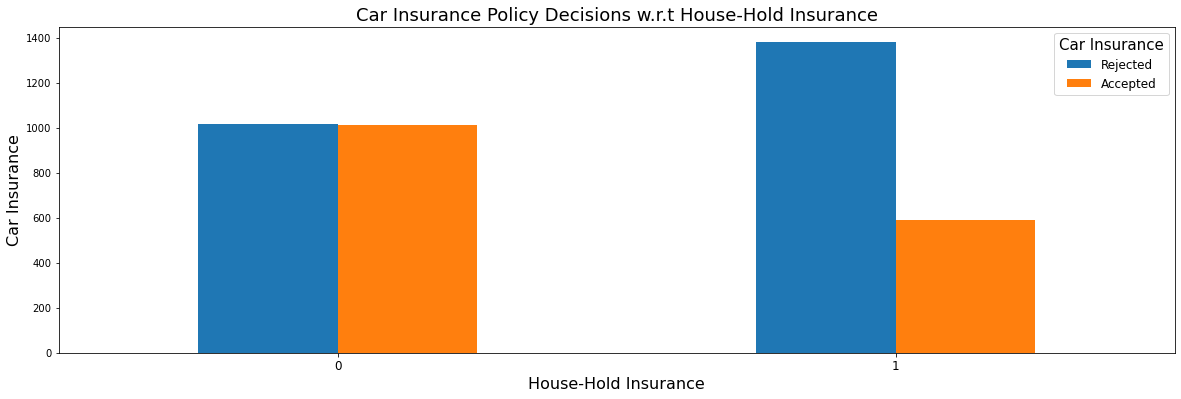

In [26]:
# Plotting the above values.

HHInsurance_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('House-Hold Insurance',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t House-Hold Insurance',fontsize=18)
plt.legend(['Rejected','Accepted','Percentage Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [27]:
# Let's check the dependancy of Loan defaulting on Car Insurance Opting Decisions

Default_crosstab=pd.crosstab(df_train['Default'],df_train['CarInsurance'],colnames=['Car Insurance'])
Default_crosstab['Percentage Enrolled']=round(Default_crosstab[1]/(Default_crosstab[0]+Default_crosstab[1])*100,2)
Default_crosstab

Car Insurance,0,1,Percentage Enrolled
Default,,,
0,2352,1590,40.33
1,44,14,24.14


* About 40% of the Non-Defaulters have enrolled in the policy & 14 Defaulters have also enrolled themselves in the policy.

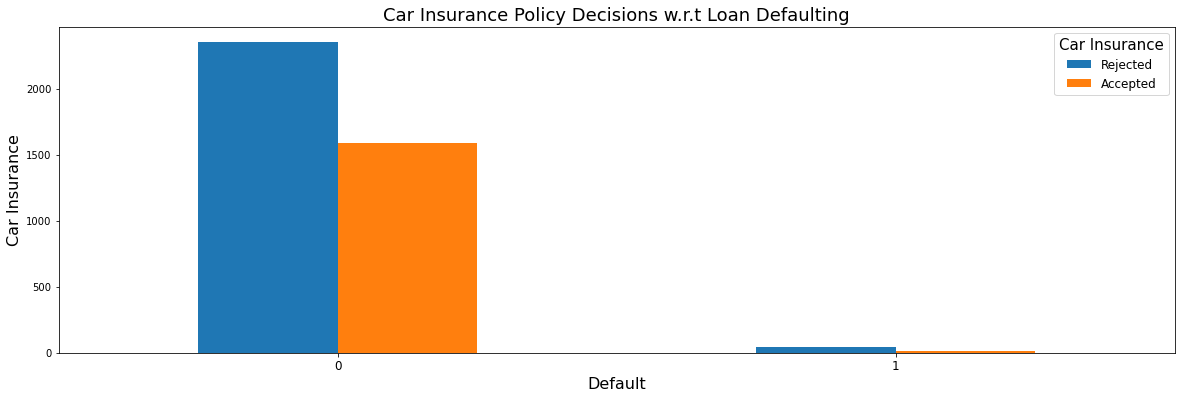

In [28]:
# Plotting the above values.

Default_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Default',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t Loan Defaulting',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [29]:
# Let's check the dependancy of Car Loan on Car Insurance Opting Decisions

CarLoan_crosstab=pd.crosstab(df_train['CarLoan'],df_train['CarInsurance'],colnames=['Car Insurance'])
CarLoan_crosstab['Percentage Enrolled']=round(CarLoan_crosstab[1]/(CarLoan_crosstab[0]+CarLoan_crosstab[1])*100,2)
CarLoan_crosstab

Car Insurance,0,1,Percentage Enrolled
CarLoan,,,
0,2016,1452,41.87
1,380,152,28.57


* About 42% of them without a car loan have enrolled in the policy.
* So, it's likely that more people without a car loan (about 41%) may enroll in the policy.

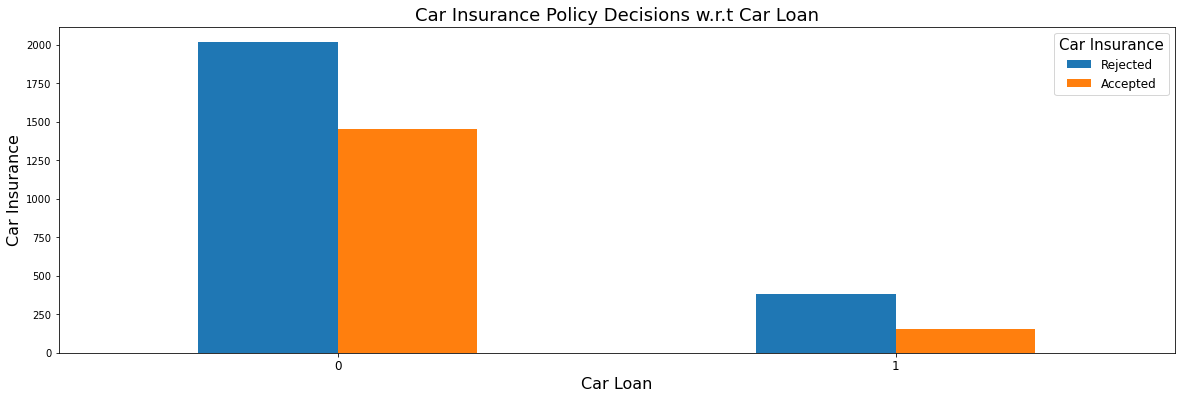

In [30]:
# Plotting the above values.

CarLoan_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Car Loan',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t Car Loan',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [31]:
# Let's check the dependancy of the Mode of Communication on Car Insurance Opting Decisions

Communication_crosstab=pd.crosstab(df_train['Communication'],df_train['CarInsurance'],colnames=['Car Insurance'])
Communication_crosstab['Percentage Enrolled']=round(Communication_crosstab[1]/(Communication_crosstab[0]+Communication_crosstab[1])*100,2)
Communication_crosstab

Car Insurance,0,1,Percentage Enrolled
Communication,,,
cellular,2252,1481,39.67
telephone,144,123,46.07


* Almost 40% of them who have been contacted through a cellular device have enrolled in the policy.
* So, the probability of getting the people enrolled in the policy by contacting them through a cellular device is high.

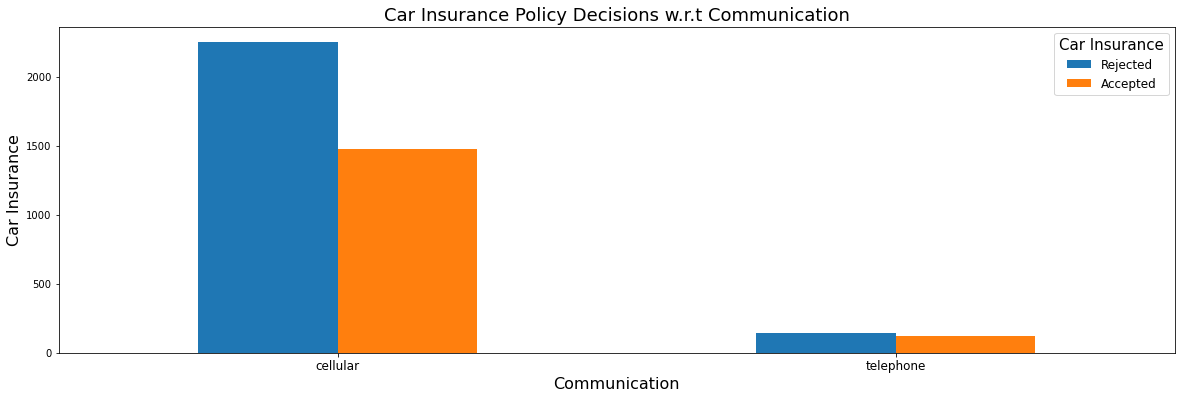

In [32]:
# Plotting the above values.

Communication_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Communication',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t Communication',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [33]:
# Let's check the dependancy of the Contact Month on Car Insurance Opting Decisions

LastContactMonth_crosstab=pd.crosstab(df_train['LastContactMonth'],df_train['CarInsurance'],colnames=['Car Insurance'])
LastContactMonth_crosstab['Percentage Enrolled']=round(LastContactMonth_crosstab[1]/(LastContactMonth_crosstab[0]+
                                                                                     LastContactMonth_crosstab[1])*100,2)
LastContactMonth_crosstab

Car Insurance,0,1,Percentage Enrolled
LastContactMonth,,,
apr,150,156,50.98
aug,342,194,36.19
dec,7,34,82.93
feb,129,133,50.76
jan,86,48,35.82
jul,364,209,36.47
jun,283,171,37.67
mar,15,64,81.01
may,760,289,27.55


* More People who have been contacted during the months of "March", "April", "September", "October" & "December" have enrolled in the policy than compared with the other months. 

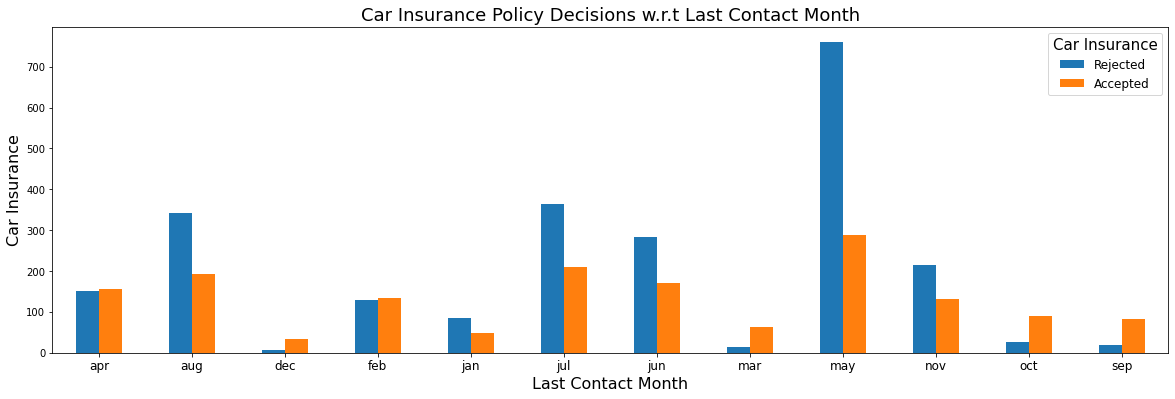

In [34]:
# Plotting the above values.

LastContactMonth_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Last Contact Month',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t Last Contact Month',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [35]:
# Let's define a new column containing the categorical values of the days of a month.

def Day_Categories(day):
    if(day >= 1 and day <= 11):
        return "Month Starting"
    elif(day >= 12 and day <= 21):
        return "Middle of the Month"
    elif(day >= 22 and day <= 31):
        return "Month Ending"

In [36]:
df_train['Day_Categories']=df_train['LastContactDay'].apply(Day_Categories)

In [37]:
# Let's check the dependancy of Last Contacted Day on Car Insurance Opting Decisions

LastContactDay_crosstab=pd.crosstab(df_train['Day_Categories'],df_train['CarInsurance'],colnames=['Car Insurance'])
LastContactDay_crosstab['Percentage Enrolled']=round(LastContactDay_crosstab[1]/(LastContactDay_crosstab[0]+
                                                                                     LastContactDay_crosstab[1])*100,2)
LastContactDay_crosstab

Car Insurance,0,1,Percentage Enrolled
Day_Categories,,,
Middle of the Month,990,624,38.66
Month Ending,622,400,39.14
Month Starting,784,580,42.52


* More people have enrolled in the policy during the Starting & ending days of the month than compared with the middle of the month.

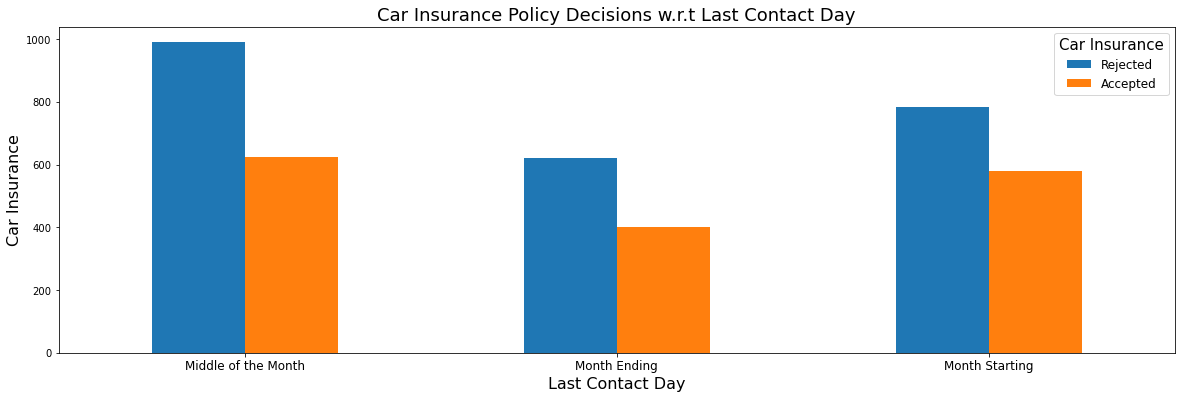

In [38]:
# Plotting the above values.

LastContactDay_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Last Contact Day',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t Last Contact Day',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [39]:
df_train.NoOfContacts.value_counts()

1     1685
2     1085
3      516
4      237
5      166
6       88
7       49
8       41
9       20
10      18
11      15
17      11
12      11
13       8
14       7
20       4
21       4
25       4
15       3
19       3
23       3
16       3
18       3
24       3
22       3
43       1
26       1
28       1
30       1
32       1
34       1
41       1
27       1
29       1
38       1
Name: NoOfContacts, dtype: int64

In [40]:
# Let's categorize the No of times the bank has contacted the customers regarding the Insurance policy.

def update_contacts(contact):
    if(contact == 1):
        return "Contacted once"
    elif(contact > 1 and contact <= 10):
        return "Contacted More than once"
    elif(contact > 10 and contact <= 20):
        return "Contacted more than 10 times"
    elif(contact > 20 and contact <= 30):
        return "Contacted more than 20"
    elif(contact > 30):
        return "Contacted more than 30 times"

In [41]:
df_train['NoOfContacts_Category']=df_train['NoOfContacts'].apply(update_contacts)

In [42]:
df_train.NoOfContacts_Category.value_counts()

Contacted More than once        2220
Contacted once                  1685
Contacted more than 10 times      68
Contacted more than 20            22
Contacted more than 30 times       5
Name: NoOfContacts_Category, dtype: int64

In [43]:
# Dependancy of No of contacts by the bank on Car Insurance Opting Decisions

NoOfContacts_Category_crosstab=pd.crosstab(df_train['NoOfContacts_Category'],df_train['CarInsurance'],colnames=['Car Insurance'])
NoOfContacts_Category_crosstab['Percentage Enrolled']=round(NoOfContacts_Category_crosstab[1]/(NoOfContacts_Category_crosstab[0]+
                                                                                     NoOfContacts_Category_crosstab[1])*100,2)
NoOfContacts_Category_crosstab

Car Insurance,0,1,Percentage Enrolled
NoOfContacts_Category,,,
Contacted More than once,1406,814,36.67
Contacted more than 10 times,54,14,20.59
Contacted more than 20,19,3,13.64
Contacted more than 30 times,5,0,0.00
Contacted once,912,773,45.88


* When contacted just once, almost 46% of them have enrolled in the policy.
* So, there's a better chance of getting the people into enrolling themselves by contacting & convincing them once or more than once in       some cases.
* So, higher the bank tries to contact the people, they're more likely to not opt the policy.

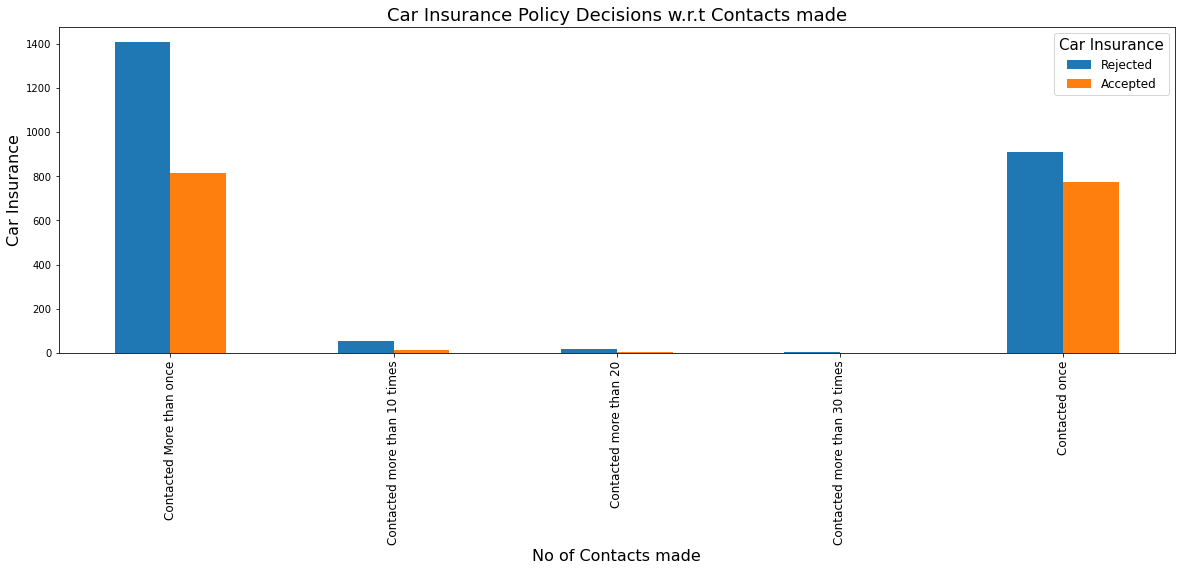

In [44]:
# Plotting the above values.

NoOfContacts_Category_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 90,fontsize=12)
plt.xlabel('No of Contacts made',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t Contacts made',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [45]:
# Converting "Call Duration" to minutes.

df_train['Call_Duration']=df_train['Call_Duration'].apply(lambda x: round(x/60),2)
df_train['Call_Duration'].head()

0     1
1     3
2     6
3    14
4     3
Name: Call_Duration, dtype: int64

In [46]:
# Dependancy of Call Duration on Car Insurance Opting Decisions

Call_Duration_crosstab=pd.crosstab(df_train['Call_Duration'],df_train['CarInsurance'],colnames=['Car Insurance'],
                                   rownames=['Call Duration (in minutes)'])
Call_Duration_crosstab['Percentage Enrolled']=round(Call_Duration_crosstab[1]/(Call_Duration_crosstab[0]+ Call_Duration_crosstab[1])*100,2)
Call_Duration_crosstab

Car Insurance,0,1,Percentage Enrolled
Call Duration (in minutes),,,
0,124,1,0.80
1,428,17,3.82
2,584,117,16.69
3,397,162,28.98
4,249,175,41.27
5,177,120,40.40
6,117,116,49.79
7,86,97,53.01
8,70,91,56.52


* 1 person who hasen't received the call has enrolled themselves in the policy.
* It can be observed that longer the call duration, more customers have enrolled themselves in the policy.
* It may be that during longer calls with the customers, the bank officials may have gotten more time to convince the customers for 
  their enrollment.

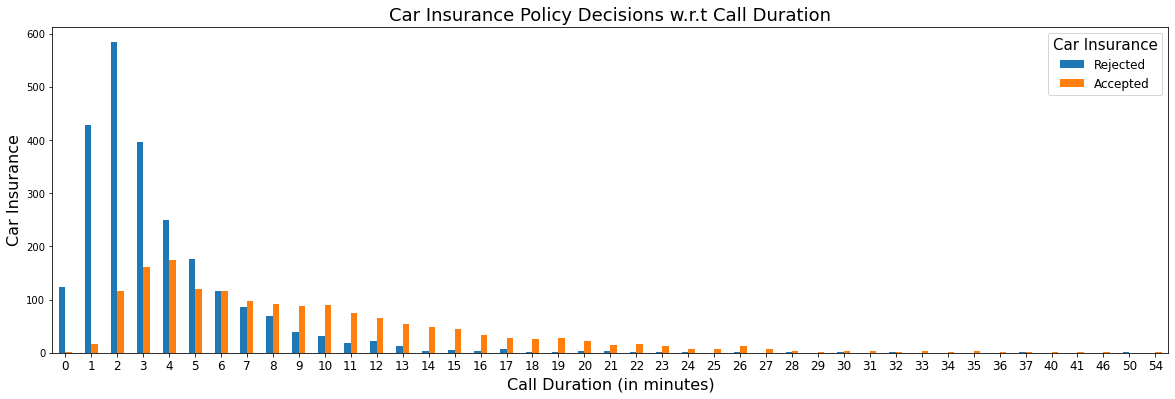

In [47]:
# Plotting the above values.

Call_Duration_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Call Duration (in minutes)',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t Call Duration',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [48]:
# Let's categorize the Call durations for better understanding according to the mean duration.

mean=df_train.Call_Duration.mean()
mean

def update_duration(call):
    if(call < mean):
        return "Less than Mean Duration"
    elif(call > mean):
        return "More than Mean Duration"

In [49]:
df_train['Call_Duration_Mean']=df_train['Call_Duration'].apply(update_duration)

In [50]:
# Dependancy of Mean Call Duration on Car Insurance Opting Decisions

Mean_Call_Duration_crosstab=pd.crosstab(df_train['Call_Duration_Mean'],df_train['CarInsurance'],colnames=['Car Insurance'],
                                   rownames=['Call Duration (in minutes)'])
Mean_Call_Duration_crosstab['Percentage Enrolled']=round(Mean_Call_Duration_crosstab[1]/(Mean_Call_Duration_crosstab[0]+ Mean_Call_Duration_crosstab[1])*100,2)
Mean_Call_Duration_crosstab

Car Insurance,0,1,Percentage Enrolled
Call Duration (in minutes),,,
Less than Mean Duration,1959,592,23.21
More than Mean Duration,437,1012,69.84


* When the call duration b/w the customers & bank is greater than the mean call duration, more customers have enrolled themselves in the policy

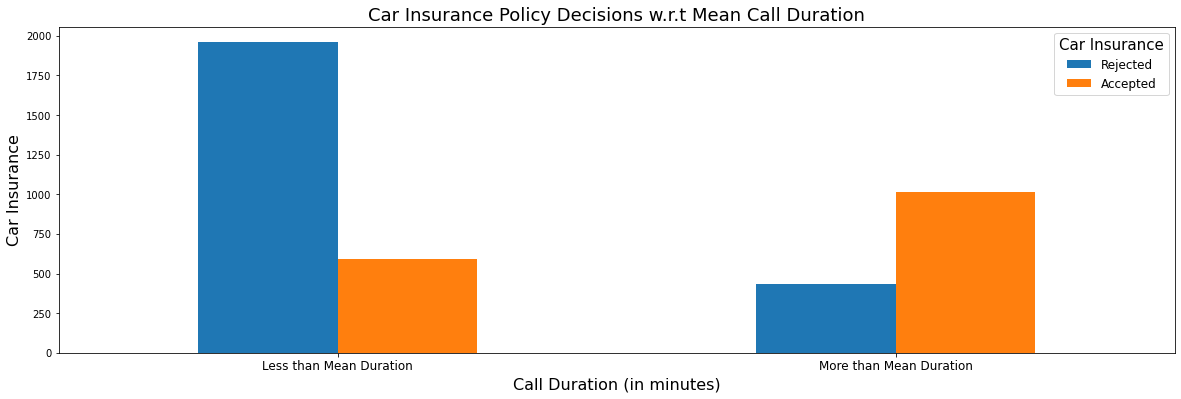

In [51]:
# Plotting the above values.

Mean_Call_Duration_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Call Duration (in minutes)',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t Mean Call Duration',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [52]:
df_train.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,...,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance,Call_Duration,Age Range,Day_Categories,NoOfContacts_Category,Call_Duration_Mean
0,1,32,management,single,tertiary,0,1218,1,0,telephone,...,-1,0,2021-02-02 13:45:20,2021-02-02 13:46:30,0,1,31-40,Month Ending,Contacted More than once,Less than Mean Duration
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,...,-1,0,2021-02-02 14:49:03,2021-02-02 14:52:08,0,3,31-40,Month Ending,Contacted More than once,Less than Mean Duration
2,3,29,management,single,tertiary,0,637,1,0,cellular,...,119,1,2021-02-02 16:30:24,2021-02-02 16:36:04,1,6,21-30,Month Starting,Contacted once,More than Mean Duration
3,4,25,student,single,primary,0,373,1,0,cellular,...,-1,0,2021-02-02 12:06:43,2021-02-02 12:20:22,1,14,21-30,Month Starting,Contacted More than once,More than Mean Duration
4,5,30,management,married,tertiary,0,2694,0,0,cellular,...,-1,0,2021-02-02 14:35:44,2021-02-02 14:38:56,0,3,21-30,Month Starting,Contacted once,Less than Mean Duration


[Text(0, 0.5, 'Id'),
 Text(0, 1.5, 'Age'),
 Text(0, 2.5, 'Default'),
 Text(0, 3.5, 'Balance'),
 Text(0, 4.5, 'HHInsurance'),
 Text(0, 5.5, 'CarLoan'),
 Text(0, 6.5, 'LastContactDay'),
 Text(0, 7.5, 'NoOfContacts'),
 Text(0, 8.5, 'DaysPassed'),
 Text(0, 9.5, 'PrevAttempts'),
 Text(0, 10.5, 'CarInsurance'),
 Text(0, 11.5, 'Call_Duration')]

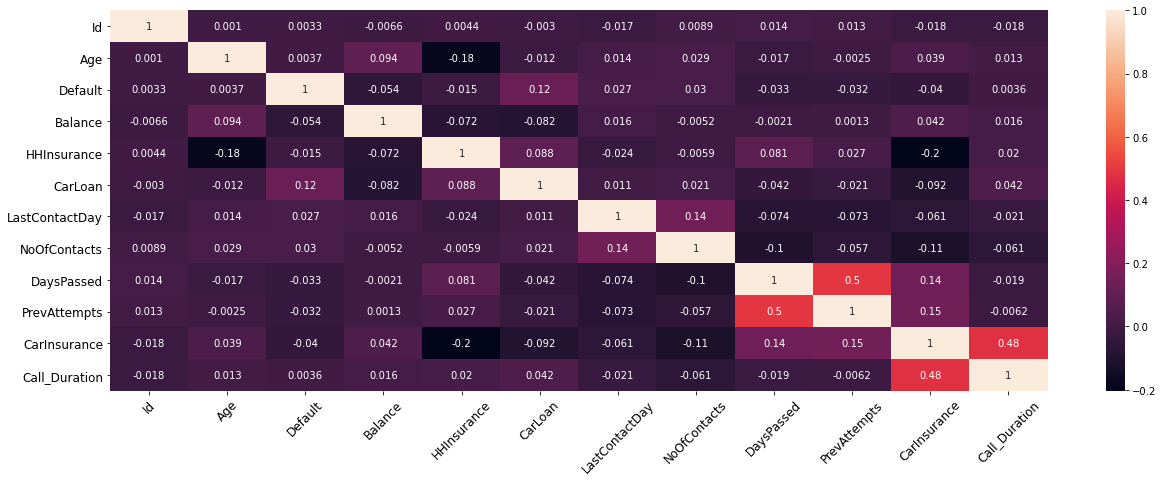

In [53]:
plt.figure(figsize=(21,7))
res=sns.heatmap(df_train.corr(),annot=True)
res.set_xticklabels (res.get_xmajorticklabels (), fontsize = 12,rotation=45)
res.set_yticklabels (res.get_xmajorticklabels (), fontsize = 12)

* There is a correlation of 0.5 b/w "DaysPassed" & PrevAttempts.
* There is a correlationof 0.48 b/w "CarInsurance" & "Call_Duration".

# Data Preparation

In [54]:
# Let's drop the columns "Id", "CallStart" & "CallEnd".

df_train.drop(['Id','CallStart','CallEnd'],axis=1,inplace=True)

In [55]:
# Let's convert all the categorical valued features into numerical values by using get_dummies method in pandas. 

df_train=pd.get_dummies(data=df_train,columns=['Job','Marital','Education','Communication','LastContactMonth','NoOfContacts_Category',
                                      'Call_Duration_Mean','Day_Categories','Age Range','Call_Duration_Mean'],drop_first=True)

In [56]:
# Removing all the duplicate columns if any.

df_train = df_train.loc[:,~df_train.columns.duplicated()]

In [57]:
# evaluating the important features for consideration using SelectKBest method.

X_temp=df_train.drop(['CarInsurance','NoOfContacts_Category_Contacted more than 10 times','NoOfContacts_Category_Contacted more than 20',
               'NoOfContacts_Category_Contacted more than 30 times','NoOfContacts_Category_Contacted once',
                'Call_Duration_Mean_More than Mean Duration','Day_Categories_Month Ending','Day_Categories_Month Starting',
               'Age Range_21-30','Age Range_31-40','Age Range_41-50','Age Range_51-60','Age Range_61-70','Age Range_71-80',
               'Age Range_81-90','Age Range_Above 90'],axis=1)

Dropping all the columns created for the purpose of visualization in the above cell along with the target label column "CarInsurance".

In [58]:
X_temp.columns

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'Call_Duration',
       'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'Marital_married',
       'Marital_single', 'Education_secondary', 'Education_tertiary',
       'Communication_telephone', 'LastContactMonth_aug',
       'LastContactMonth_dec', 'LastContactMonth_feb', 'LastContactMonth_jan',
       'LastContactMonth_jul', 'LastContactMonth_jun', 'LastContactMonth_mar',
       'LastContactMonth_may', 'LastContactMonth_nov', 'LastContactMonth_oct',
       'LastContactMonth_sep'],
      dtype='object')

In [59]:
y_temp=df_train['CarInsurance']

# Feature Engineering

In [60]:
# As there are -ve values present in the data, we need to use "f_classif" scoring function.
# Let's select top 35 features.

Best_Params=SelectKBest(score_func=f_classif, k=35)
Best_Params.fit(X_temp,y_temp)

SelectKBest(k=35)

In [61]:
df_scores=pd.DataFrame(Best_Params.scores_)                    # Feature Scores
df_columns=pd.DataFrame(X_temp.columns)                        # Feature Names
df_score_evaluation=pd.concat([df_scores,df_columns],axis=1)   # Concatinating both the dataframes
df_score_evaluation.columns=['Scores','Features']              # Renaming the columns
print(df_score_evaluation.nlargest(35,'Scores'))               # Sorting Scores in Descending order

         Scores                 Features
9   1198.055450            Call_Duration
3    172.575896              HHInsurance
32    95.412381     LastContactMonth_may
8     90.479299             PrevAttempts
7     78.701196               DaysPassed
35    77.826465     LastContactMonth_sep
34    70.556437     LastContactMonth_oct
31    56.932211     LastContactMonth_mar
6     53.472402             NoOfContacts
10    49.915808          Job_blue-collar
17    39.401989              Job_student
14    38.320420              Job_retired
23    35.575403       Education_tertiary
20    35.511562          Marital_married
4     34.226084                  CarLoan
26    31.867631     LastContactMonth_dec
21    27.579457           Marital_single
19    15.886827           Job_unemployed
5     15.065534           LastContactDay
27    13.309601     LastContactMonth_feb
22    13.153200      Education_secondary
13     7.373162           Job_management
2      6.917765                  Balance
11     6.493650 

In [62]:
X_temp.columns.sort_values()

Index(['Age', 'Balance', 'Call_Duration', 'CarLoan', 'Communication_telephone',
       'DaysPassed', 'Default', 'Education_secondary', 'Education_tertiary',
       'HHInsurance', 'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'LastContactDay',
       'LastContactMonth_aug', 'LastContactMonth_dec', 'LastContactMonth_feb',
       'LastContactMonth_jan', 'LastContactMonth_jul', 'LastContactMonth_jun',
       'LastContactMonth_mar', 'LastContactMonth_may', 'LastContactMonth_nov',
       'LastContactMonth_oct', 'LastContactMonth_sep', 'Marital_married',
       'Marital_single', 'NoOfContacts', 'PrevAttempts'],
      dtype='object')

In [63]:
import copy
X_new=copy.deepcopy(X_temp)
X_new.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Call_Duration,...,LastContactMonth_dec,LastContactMonth_feb,LastContactMonth_jan,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep
0,32,0,1218,1,0,28,2,-1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,32,0,1156,1,0,26,5,-1,0,3,...,0,0,0,0,0,0,1,0,0,0
2,29,0,637,1,0,3,1,119,1,6,...,0,0,0,0,1,0,0,0,0,0
3,25,0,373,1,0,11,2,-1,0,14,...,0,0,0,0,0,0,1,0,0,0
4,30,0,2694,0,0,3,1,-1,0,3,...,0,0,0,0,1,0,0,0,0,0


In [64]:
y_new=copy.deepcopy(y_temp)

In [65]:
# Let's split the data into Training & Test sets.

X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.20,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 36)
(800, 36)
(3200,)
(800,)


# Model Training

In [66]:
# LOGISTIC REGRESSION MODEL

lr_model=LogisticRegression()

# Hyper-parameter tuning
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
lr_c = [100, 10, 1.0, 0.1, 0.01]

lr_grid = dict(solver=solvers,penalty=penalty,C=lr_c)

# cross-validation using Repeated Stratified K-fold method.
lr_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Grid Search CV method loops through the different hyper parameters determining the optimal values.
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_grid, n_jobs=-1, cv=lr_cv, scoring='accuracy',error_score=0)

# Fitting the Model to the Dataset.
lr_grid_result=lr_grid_search.fit(X_train,y_train)

# returns the best hyper parameters.
lr_grid_result.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [67]:
# Making predictions using our model.
lr_grid_predictions=lr_grid_result.predict(X_test)

LOGISTIC REGRESSION Model Performance Metrics:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       484
           1       0.81      0.72      0.76       316

    accuracy                           0.82       800
   macro avg       0.82      0.80      0.81       800
weighted avg       0.82      0.82      0.82       800

CONFUSION MATRIX :
[[431  53]
 [ 89 227]]


NO SKILL CLASSIFIER: ROC AUC=0.500
LOGISTIC REGRESSION: ROC AUC=0.804


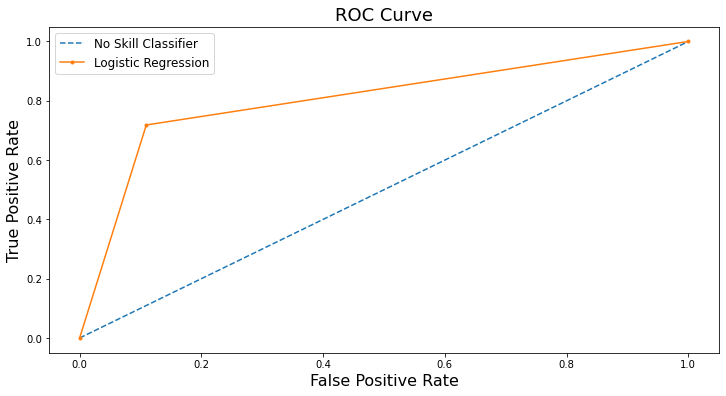

In [68]:
# Model Metrics

print("LOGISTIC REGRESSION Model Performance Metrics:")
print(classification_report(y_test,lr_grid_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,lr_grid_predictions))
print("\n")

plt.figure(figsize=(12,6))
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,lr_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)             
lr_auc = roc_auc_score(y_test, lr_grid_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('LOGISTIC REGRESSION: ROC AUC=%.3f' % (lr_auc))

pyplot.xlabel('False Positive Rate',fontsize=16)
pyplot.ylabel('True Positive Rate',fontsize=16)
pyplot.title("ROC Curve",fontsize=18)
pyplot.legend(prop={'size':12})
pyplot.show()

In [69]:
rc_model=RidgeClassifier()

alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

rc_grid = dict(alpha=alpha)

rc_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

rc_grid_search = GridSearchCV(estimator=rc_model, param_grid=rc_grid, n_jobs=-1, cv=rc_cv, scoring='accuracy',error_score=0)

rc_grid_result=rc_grid_search.fit(X_train,y_train)

rc_grid_result.best_params_

{'alpha': 1.0}

In [70]:
rc_grid_predictions=rc_grid_result.predict(X_test)

RIDGE CLASSIFIER Model Performance Metrics:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       484
           1       0.81      0.67      0.73       316

    accuracy                           0.81       800
   macro avg       0.81      0.78      0.79       800
weighted avg       0.81      0.81      0.80       800

CONFUSION MATRIX :
[[434  50]
 [105 211]]


NO SKILL CLASSIFIER: ROC AUC=0.500
RIDGE CLASSIFIER: ROC AUC=0.782


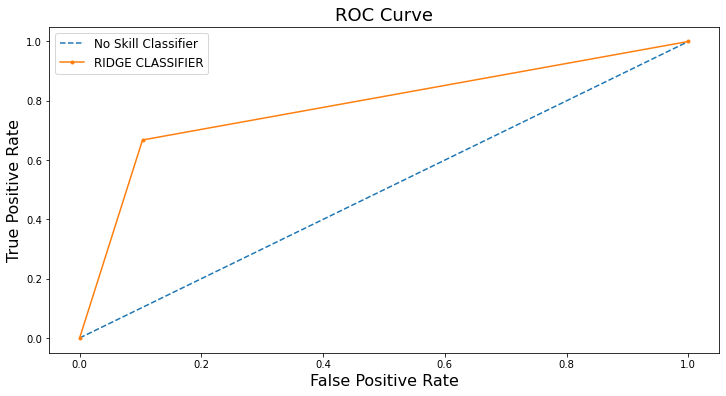

In [71]:
print("RIDGE CLASSIFIER Model Performance Metrics:")
print(classification_report(y_test,rc_grid_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,rc_grid_predictions))
print("\n")

plt.figure(figsize=(12,6))
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,rc_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

pyplot.plot(fpr, tpr, marker='.', label='RIDGE CLASSIFIER')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)             
rc_auc = roc_auc_score(y_test, rc_grid_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('RIDGE CLASSIFIER: ROC AUC=%.3f' % (rc_auc))

pyplot.xlabel('False Positive Rate',fontsize=16)
pyplot.ylabel('True Positive Rate',fontsize=16)
pyplot.title("ROC Curve",fontsize=18)
pyplot.legend(prop={'size':12})
pyplot.show()

In [72]:
dtc_model=DecisionTreeClassifier()

dtc_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(1, 10),'min_samples_split':range(1,10),'min_samples_leaf':range(1,5)}

dtc_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

dtc_grid_search = GridSearchCV(estimator=dtc_model, param_grid=dtc_grid, n_jobs=-1, cv=dtc_cv, scoring='accuracy',error_score=0)

dtc_grid_result=dtc_grid_search.fit(X_train,y_train) 

dtc_grid_result.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 7}

In [73]:
dtc_grid_predictions=dtc_grid_result.predict(X_test)

DECISION TREE CLASSIFIER Model Performance Metrics:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       484
           1       0.77      0.75      0.76       316

    accuracy                           0.81       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.81      0.81      0.81       800

CONFUSION MATRIX :
[[414  70]
 [ 80 236]]


NO SKILL CLASSIFIER: ROC AUC=0.500
DECISION TREE CLASSIFIER: ROC AUC=0.801


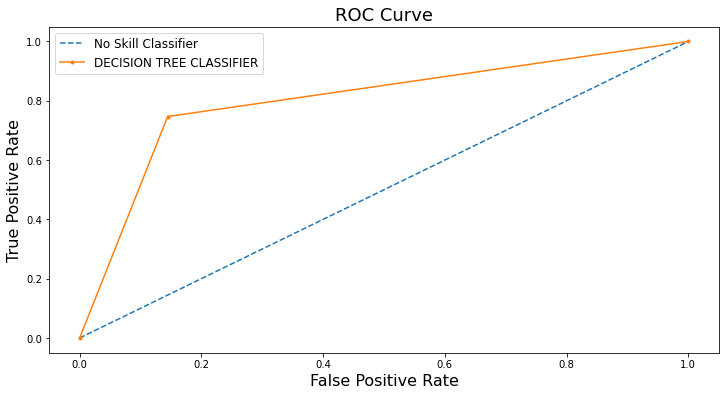

In [74]:
print("DECISION TREE CLASSIFIER Model Performance Metrics:")
print(classification_report(y_test,dtc_grid_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,dtc_grid_predictions))
print("\n")

plt.figure(figsize=(12,6))
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,dtc_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

pyplot.plot(fpr, tpr, marker='.', label='DECISION TREE CLASSIFIER')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)             
dtc_auc = roc_auc_score(y_test, dtc_grid_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('DECISION TREE CLASSIFIER: ROC AUC=%.3f' % (dtc_auc))

pyplot.xlabel('False Positive Rate',fontsize=16)
pyplot.ylabel('True Positive Rate',fontsize=16)
pyplot.title("ROC Curve",fontsize=18)
pyplot.legend(prop={'size':12})
pyplot.show()

In [75]:
bc_model=BaggingClassifier()

bc_n_estimators = [1000]

bc_grid = dict(n_estimators=bc_n_estimators)

bc_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

bc_grid_search = GridSearchCV(estimator=bc_model, param_grid=bc_grid, n_jobs=-1, cv=bc_cv, scoring='accuracy',error_score=0)

bc_grid_result=bc_grid_search.fit(X_train,y_train)

bc_grid_result.best_params_

{'n_estimators': 1000}

In [76]:
bc_grid_predictions=bc_grid_result.predict(X_test)

BAGGING CLASSIFIER Model Performance Metrics:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       484
           1       0.79      0.77      0.78       316

    accuracy                           0.83       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.83      0.83      0.83       800

CONFUSION MATRIX :
[[419  65]
 [ 73 243]]


NO SKILL CLASSIFIER: ROC AUC=0.500
BAGGING CLASSIFIER: ROC AUC=0.817


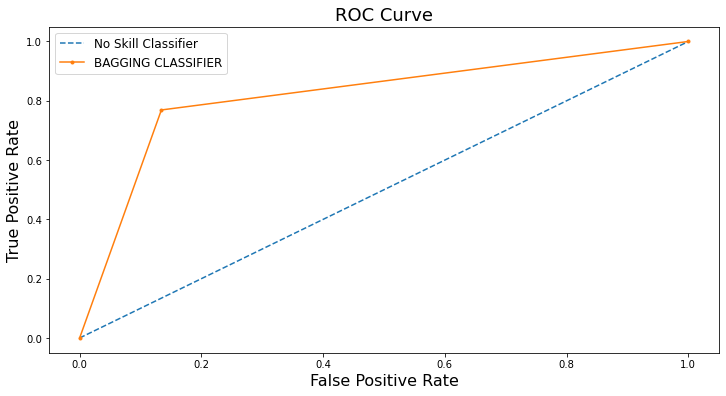

In [77]:
print("BAGGING CLASSIFIER Model Performance Metrics:")
print(classification_report(y_test,bc_grid_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,bc_grid_predictions))
print("\n")

plt.figure(figsize=(12,6))
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,bc_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

pyplot.plot(fpr, tpr, marker='.', label='BAGGING CLASSIFIER')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)             
bc_auc = roc_auc_score(y_test, bc_grid_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('BAGGING CLASSIFIER: ROC AUC=%.3f' % (bc_auc))

pyplot.xlabel('False Positive Rate',fontsize=16)
pyplot.ylabel('True Positive Rate',fontsize=16)
pyplot.title("ROC Curve",fontsize=18)
pyplot.legend(prop={'size':12})
pyplot.show()

In [78]:
knc_model=KNeighborsClassifier()

n_neighbors = range(1, 21)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

knc_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

knc_grid_search = GridSearchCV(estimator=knc_model, param_grid=knc_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

knc_grid_result=knc_grid_search.fit(X_train,y_train)

knc_grid_result.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

In [79]:
knc_grid_predictions=knc_grid_result.predict(X_test)

K-NEIGHBOURS CLASSIFIER Model Performance Metrics:
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       484
           1       0.63      0.42      0.51       316

    accuracy                           0.68       800
   macro avg       0.66      0.63      0.63       800
weighted avg       0.67      0.68      0.66       800

CONFUSION MATRIX :
[[407  77]
 [183 133]]


NO SKILL CLASSIFIER: ROC AUC=0.500
K-NEIGHBOURS CLASSIFIER: ROC AUC=0.631


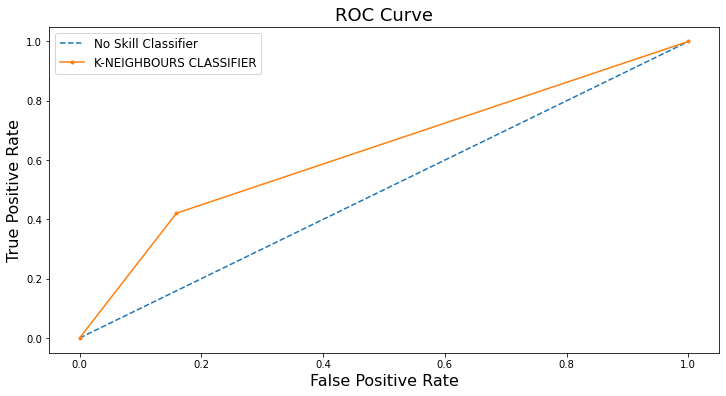

In [80]:
print("K-NEIGHBOURS CLASSIFIER Model Performance Metrics:")
print(classification_report(y_test,knc_grid_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,knc_grid_predictions))
print("\n")

plt.figure(figsize=(12,6))
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,knc_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

pyplot.plot(fpr, tpr, marker='.', label='K-NEIGHBOURS CLASSIFIER')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)             
knc_auc = roc_auc_score(y_test, knc_grid_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('K-NEIGHBOURS CLASSIFIER: ROC AUC=%.3f' % (knc_auc))

pyplot.xlabel('False Positive Rate',fontsize=16)
pyplot.ylabel('True Positive Rate',fontsize=16)
pyplot.title("ROC Curve",fontsize=18)
pyplot.legend(prop={'size':12})
pyplot.show()

In [81]:
rfc_model=RandomForestClassifier()

max_features = ['sqrt', 'log2']

rfc_n_estimators = [1000]

rfc_grid = dict(n_estimators=rfc_n_estimators,max_features=max_features)

rfc_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

rfc_grid_search = GridSearchCV(estimator=rfc_model, param_grid=rfc_grid, n_jobs=-1, cv=rfc_cv, scoring='accuracy',error_score=0)

rfc_grid_result=rfc_grid_search.fit(X_train,y_train)

rfc_grid_result.best_params_

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'max_features': 'sqrt', 'n_estimators': 1000}

In [82]:
rfc_grid_predictions=rfc_grid_result.predict(X_test)

RANDOM FOREST CLASSIFIER Model Performance Metrics:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       484
           1       0.80      0.80      0.80       316

    accuracy                           0.84       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.84      0.84      0.84       800

CONFUSION MATRIX :
[[419  65]
 [ 62 254]]


NO SKILL CLASSIFIER: ROC AUC=0.500
RANDOM FOREST CLASSIFIER: ROC AUC=0.835


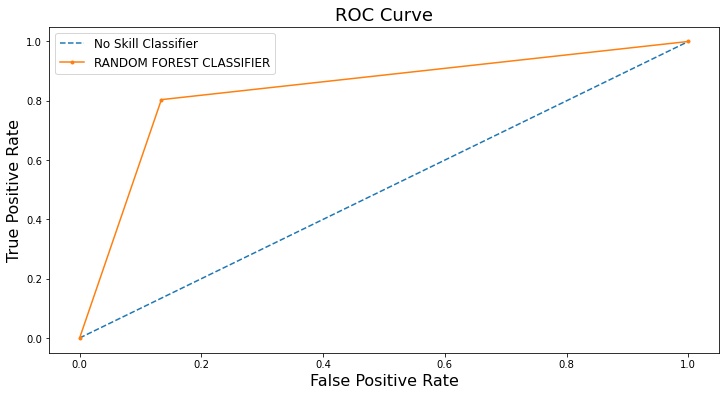

In [83]:
print("RANDOM FOREST CLASSIFIER Model Performance Metrics:")
print(classification_report(y_test,rfc_grid_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,rfc_grid_predictions))
print("\n")

plt.figure(figsize=(12,6))
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,rfc_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

pyplot.plot(fpr, tpr, marker='.', label='RANDOM FOREST CLASSIFIER')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)             
rfc_auc = roc_auc_score(y_test, rfc_grid_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('RANDOM FOREST CLASSIFIER: ROC AUC=%.3f' % (rfc_auc))

pyplot.xlabel('False Positive Rate',fontsize=16)
pyplot.ylabel('True Positive Rate',fontsize=16)
pyplot.title("ROC Curve",fontsize=18)
pyplot.legend(prop={'size':12})
pyplot.show()

In [84]:
svc_model=SVC()

#kernel = ['poly', 'rbf', 'sigmoid']
#C = [50, 10, 1.0, 0.1, 0.01]

kernel=['rbf']
C=[1000]
gamma = ['scale']

svc_grid = dict(kernel=kernel,C=C,gamma=gamma)

svc_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

svc_grid_search = GridSearchCV(estimator=svc_model, param_grid=svc_grid, n_jobs=-1, cv=svc_cv, scoring='accuracy',error_score=0)

svc_grid_result=svc_grid_search.fit(X_train,y_train)

svc_grid_result.best_params_

{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}

In [85]:
svc_grid_predictions=svc_grid_result.predict(X_test)

SVM CLASSIFIER Model Performance Metrics:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       484
           1       0.82      0.49      0.61       316

    accuracy                           0.76       800
   macro avg       0.78      0.71      0.72       800
weighted avg       0.77      0.76      0.74       800

CONFUSION MATRIX :
[[450  34]
 [161 155]]


NO SKILL CLASSIFIER: ROC AUC=0.500
SVM CLASSIFIER: ROC AUC=0.710


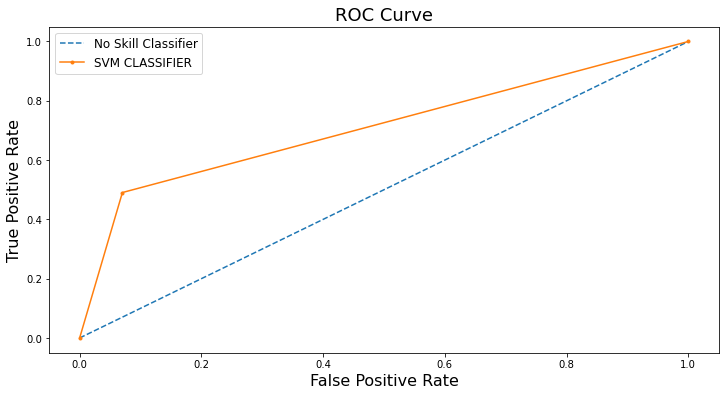

In [86]:
print("SVM CLASSIFIER Model Performance Metrics:")
print(classification_report(y_test,svc_grid_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,svc_grid_predictions))
print("\n")

plt.figure(figsize=(12,6))
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,svc_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

pyplot.plot(fpr, tpr, marker='.', label='SVM CLASSIFIER')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)             
svc_auc = roc_auc_score(y_test, svc_grid_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('SVM CLASSIFIER: ROC AUC=%.3f' % (svc_auc))

pyplot.xlabel('False Positive Rate',fontsize=16)
pyplot.ylabel('True Positive Rate',fontsize=16)
pyplot.title("ROC Curve",fontsize=18)
pyplot.legend(prop={'size':12})
pyplot.show()

In [87]:
gnb_model=GaussianNB()

gnb_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

gnb_grid_search = GridSearchCV(estimator=gnb_model, param_grid=gnb_grid, n_jobs=-1, cv=gnb_cv, scoring='accuracy',error_score=0)

gnb_grid_result=gnb_grid_search.fit(X_train,y_train)

gnb_grid_result.best_params_

{'var_smoothing': 8.111308307896856e-09}

In [88]:
gnb_grid_predictions=gnb_grid_result.predict(X_test)

GAUSSIANNB Model Performance Metrics:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       484
           1       0.75      0.64      0.69       316

    accuracy                           0.77       800
   macro avg       0.77      0.75      0.75       800
weighted avg       0.77      0.77      0.77       800

CONFUSION MATRIX :
[[416  68]
 [115 201]]


NO SKILL CLASSIFIER: ROC AUC=0.500
GAUSSIANNB CLASSIFIER: ROC AUC=0.748


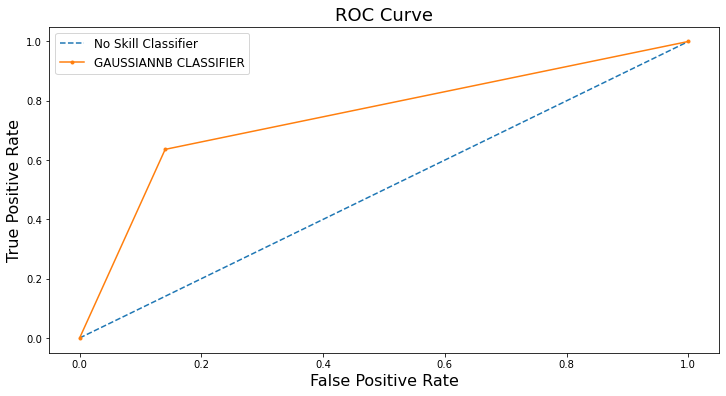

In [89]:
print("GAUSSIANNB Model Performance Metrics:")
print(classification_report(y_test,gnb_grid_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,gnb_grid_predictions))
print("\n")

plt.figure(figsize=(12,6))
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,gnb_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

pyplot.plot(fpr, tpr, marker='.', label='GAUSSIANNB CLASSIFIER')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)             
gnb_auc = roc_auc_score(y_test, gnb_grid_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('GAUSSIANNB CLASSIFIER: ROC AUC=%.3f' % (gnb_auc))

pyplot.xlabel('False Positive Rate',fontsize=16)
pyplot.ylabel('True Positive Rate',fontsize=16)
pyplot.title("ROC Curve",fontsize=18)
pyplot.legend(prop={'size':12})
pyplot.show()

In [90]:
gbc_model=GradientBoostingClassifier()

#n_estimators = [10, 100, 1000]
#gbc_n_estimators = [0.001, 0.01, 0.1]
#gbc_subsample = [0.5, 0.7, 1.0]
#gbc_max_depth = [3, 7, 9]
#gbc_learning_rate = [0.0001, 0.001, 0.01, 0.1]

gbc_n_estimators = [1000]
gbc_learning_rate = [0.01]
gbc_subsample = [0.5]
gbc_max_depth = [7]

gbc_grid = dict(learning_rate=gbc_learning_rate, n_estimators=gbc_n_estimators, subsample=gbc_subsample, max_depth=gbc_max_depth)

gbc_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

gbc_grid_search = GridSearchCV(estimator=gbc_model, param_grid=gbc_grid, n_jobs=-1, cv=gbc_cv, scoring='accuracy',error_score=0)

gbc_grid_result=gbc_grid_search.fit(X_train,y_train)

gbc_grid_result.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.5}

In [91]:
gbc_grid_predictions=gbc_grid_result.predict(X_test)

GRADIENT BOOSTING Model Performance Metrics:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       484
           1       0.80      0.81      0.80       316

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800

CONFUSION MATRIX :
[[419  65]
 [ 60 256]]


NO SKILL CLASSIFIER: ROC AUC=0.500
GRADIENT BOOSTING MODEL: ROC AUC=0.838


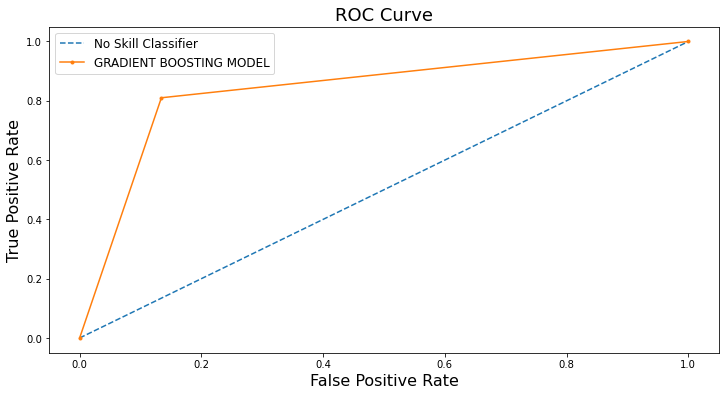

In [92]:
print("GRADIENT BOOSTING Model Performance Metrics:")
print(classification_report(y_test,gbc_grid_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,gbc_grid_predictions))
print("\n")

plt.figure(figsize=(12,6))
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,gbc_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

pyplot.plot(fpr, tpr, marker='.', label='GRADIENT BOOSTING MODEL')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)             
gbc_auc = roc_auc_score(y_test, gbc_grid_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('GRADIENT BOOSTING MODEL: ROC AUC=%.3f' % (gbc_auc))

pyplot.xlabel('False Positive Rate',fontsize=16)
pyplot.ylabel('True Positive Rate',fontsize=16)
pyplot.title("ROC Curve",fontsize=18)
pyplot.legend(prop={'size':12})
pyplot.show()

In [93]:
xgbc_model=XGBClassifier()

#n_estimators = [10,100,1000]
#xgbc_learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
#xgbc_subsample = [0.3,0.4,0.5,.6,0.7,0.8,0.9]
#xgbc_max_depth = [3, 4, 5, 6, 7, 8, 9]
#colsample_bytree = [0.5,0.6,0.7,0.8,0.9],
#xgbc_min_child_weight = [1, 2, 3, 4]

xgbc_n_estimators = [1000]
xgbc_learning_rate = [0.01]
xgbc_subsample = [0.7]
xgbc_max_depth = [8]
xgbc_min_child_weight = [1]

grid = dict(n_estimators=xgbc_n_estimators,learning_rate=xgbc_learning_rate,subsample=xgbc_subsample,max_depth=xgbc_max_depth,
min_child_weight=xgbc_min_child_weight)

xgbc_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

xgbc_grid_search = GridSearchCV(estimator=xgbc_model, param_grid=grid, n_jobs=-1, cv=xgbc_cv, scoring='accuracy',error_score=0)

xgbc_grid_result=xgbc_grid_search.fit(X_train,y_train)

xgbc_grid_result.best_params_

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'learning_rate': 0.01,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 1000,
 'subsample': 0.7}

In [94]:
xgbc_grid_predictions=xgbc_grid_result.predict(X_test)

EXTREME GRADIENT BOOSTING Model Performance Metrics:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       484
           1       0.80      0.80      0.80       316

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800

CONFUSION MATRIX :
[[421  63]
 [ 62 254]]


NO SKILL CLASSIFIER: ROC AUC=0.500
EXTREME GRADIENT BOOSTING MODEL: ROC AUC=0.837


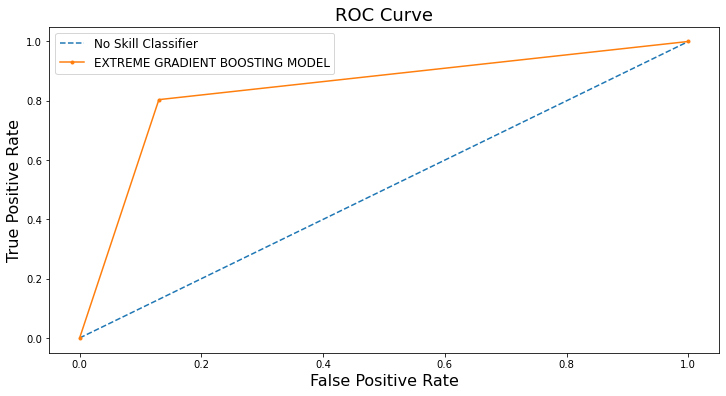

In [95]:
print("EXTREME GRADIENT BOOSTING Model Performance Metrics:")
#print(classification_report(y_test,xgbc_grid_predictions,output_dict=True))
print(classification_report(y_test,xgbc_grid_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,xgbc_grid_predictions))
print("\n")

plt.figure(figsize=(12,6))
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,xgbc_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

pyplot.plot(fpr, tpr, marker='.', label='EXTREME GRADIENT BOOSTING MODEL')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)             
xgbc_auc = roc_auc_score(y_test, xgbc_grid_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('EXTREME GRADIENT BOOSTING MODEL: ROC AUC=%.3f' % (xgbc_auc))

pyplot.xlabel('False Positive Rate',fontsize=16)
pyplot.ylabel('True Positive Rate',fontsize=16)
pyplot.title("ROC Curve",fontsize=18)
pyplot.legend(prop={'size':12})
pyplot.show()

**Let's Display all the Model Metrics in a dataframe for easier analysis**

In [96]:
# Model Names
Model_Names=['LOGISTIC REGRESSION', 'RIDGE CLASSIFIER', 'DECISION TREE', 'BAGGING CLASSIFIER', 'K-NEIGHBOURS CLASSIFIER', 'RANDOM FOREST',
            'SVM CLASSIFIER', 'GAUSSIANNB CLASSIFIER', 'GRADIENT BOOSTING', 'EXTREME GRADIENT BOOSTING']

# DataFrame Index values
Index=['Accuracy','Precision','Recall','F1 Score','AUC Score']

# Model Prediction values
Model_Predictions=[lr_grid_predictions,rc_grid_predictions,dtc_grid_predictions,bc_grid_predictions,knc_grid_predictions,
                   rfc_grid_predictions,svc_grid_predictions,gnb_grid_predictions,gbc_grid_predictions,xgbc_grid_predictions]

# Model Metrics methods
model_metrics=[accuracy_score,precision_score,recall_score,f1_score,roc_auc_score]

# DataFrame Initialisation
Model_Metrics_Comparison=pd.DataFrame(columns=Model_Names,index=Index)

# Let's fill the dataframe with the model metrics values of all the trained models above.
for index,metric in zip(range(0,5),model_metrics):
    for model_name,model_prediction in zip(Model_Names,Model_Predictions):
        Model_Metrics_Comparison[model_name].values[index]=metric(y_test,model_prediction)*100

# Metric values in Percentage (%).
Model_Metrics_Comparison

,LOGISTIC REGRESSION,RIDGE CLASSIFIER,DECISION TREE,BAGGING CLASSIFIER,K-NEIGHBOURS CLASSIFIER,RANDOM FOREST,SVM CLASSIFIER,GAUSSIANNB CLASSIFIER,GRADIENT BOOSTING,EXTREME GRADIENT BOOSTING
Accuracy,82.25,80.625,81.25,82.75,67.5,84.125,75.625,77.125,84.375,84.375
Precision,81.0714,80.8429,77.1242,78.8961,63.3333,79.6238,82.0106,74.7212,79.7508,80.1262
Recall,71.8354,66.7722,74.6835,76.8987,42.0886,80.3797,49.0506,63.6076,81.0127,80.3797
F1 Score,76.1745,73.1369,75.8842,77.8846,50.5703,80,61.3861,68.7179,80.3768,80.2528
AUC Score,80.4425,78.2208,80.1104,81.7345,63.0898,83.475,71.0129,74.779,83.7915,83.6816


* From the above dataframe, we can see that "Extreme Gradient Boosting Classifier" has an accuracy of 84.3% which is the highest among all
  the trained models & also "Random Forest Classifier" has an accuracy of 84.1%.

* As we cannot always depend only on the accuracy of models, we also need to consider other metrics such as "Precision", "Recall" & 
  "F1 Score" for optimal results.
  
* When a model has high values for both precision & recall, then it can be told that, that model is performing well.

*  So in this case, out of any of the following models i.e., ("BAGGING CLASSIFIER", "RANDOM FOREST CLASSIFIER", "GRADIENT BOOSTING" & 
   "EXTREME GRADIENT BOOSTING"), we can get good results as all 4 models are having almost same Precision & Recall values.
   
* In the case of "F1 Score", as it is the weighted average of both precision & Recall Metrics, it can be more useful than Accuracy most of   the time.
* We can also observe from the AUC Scores that, the Models "EXTREME GRADIENT BOOSTING", "GRADIENT BOOSTING" & "RANDOM FOREST CLASSIFIER" have good Area under Curve values.

* Moving ahead, I'll try to improve the model performances and Metric results.

**If you like my Kernel, Please Upvote. Please feel free to provide suggestions in the comments which helps me to improve myself. Thank you :)**